# Shepherd's cylinder sundial generator

Michael Robinson

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Basic parameters

In [2]:
latitude = 39 # degrees N

In [3]:
chart_height = 1.75 # inches
cylinder_diameter = 3.0/8.0 # inches
hours_displayed = [6,7,8,9,10,11,12]
month_tick_length = 0.25 # inches
day_tick_length = month_tick_length/4.0

In [4]:
equinox_day = 31+28+20 # Date of equinox
solar_inclination = 23.4 # degrees

## Convenience functions

In [5]:
def sun_ra(n):
    '''Compute right ascension (in radians) of the sun from its day n past 1 January 2000.
    
    Source https://en.wikipedia.org/wiki/Position_of_the_Sun
    '''
    L=280.460 +0.9856003*n
    g=357.528+0.9856003*n
    lam=L + 1.915*np.sin(g*np.pi/180)+0.02*np.sin(2*np.pi/180*g)
    eps=23.439+0.00000004*n
    ra=np.arctan2(np.cos(eps*np.pi/180)*np.sin(lam*np.pi/180),np.cos(lam*np.pi/180))
    return ra

In [6]:
def eq_of_time(D):
    '''Compute equation of time (minutes) for day D
    
    Source https://en.wikipedia.org/wiki/Equation_of_time
    '''
    M=6.24004077 + 0.01720197*D
    dT = -7.659 * np.sin(M) + 9.863 * np.sin(2*M + 3.5932)
    return dT

## Calculations

Days of the year setup

In [7]:
days=np.arange(0,365) # Day numbers
day_position=days/365*cylinder_diameter*np.pi # Position of days in inches along top of scale

month_days=[31,28,31,30,31,30,31,31,30,31,30,31]
month_names=['J','F','M','A','M','J','J','A','S','O','N','D']

month_ticks=[0]
for i in range(12):
    month_ticks.append(month_days[i]*np.pi*cylinder_diameter/365+month_ticks[i])

Sun elevations at each hour

In [8]:
sun_hours_elevations=[]

for hour in hours_displayed:
    hour_angle=(hour-12)/24*2*np.pi
    
    sun_hour_elevations=[]

    for n in days:
        tick_angle=sun_ra(n+0.5) # Angle of sun at noon

        # Location of the sun on celestial sphere at noon
        x=np.cos(tick_angle)
        y=np.sin(tick_angle)*np.cos(solar_inclination*np.pi/180)
        z=np.sin(tick_angle)*np.sin(solar_inclination*np.pi/180)
        
        # Local zenith vector at this hour
        zx=np.cos(hour_angle+tick_angle)*np.cos(latitude*np.pi/180)
        zy=np.sin(hour_angle+tick_angle)*np.cos(latitude*np.pi/180)
        zz=np.sin(latitude*np.pi/180)
        
        # Compute sun elevation
        sun_hour_elevation=np.pi/2-np.arccos(x*zx+y*zy+z*zz)
        sun_hour_elevations.append(sun_hour_elevation)
    sun_hours_elevations.append(np.array(sun_hour_elevations))

## Drawing

Gnomon length 0.4853179521047175 inches = 12.327075983459824 mm


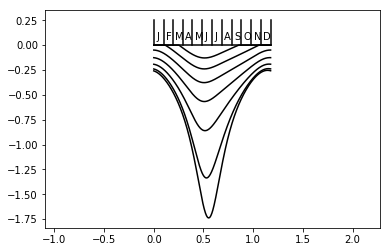

In [9]:
gnomon_length=chart_height/np.tan((113.5-latitude)*np.pi/180)
plt.figure()
for sun_hour_elevations in sun_hours_elevations:
    displacements=-gnomon_length*np.tan(sun_hour_elevations)
    displacements[displacements>0]=0
    plt.plot(day_position,displacements,'k')
plt.plot([0,day_position[-1]],[0,0],'k')
for i,month_tick in enumerate(month_ticks):
    plt.plot([month_tick,month_tick],[month_tick_length,0],'k')
    if i < 12:
        plt.text(month_tick+7/365*cylinder_diameter*np.pi,month_tick_length-0.2,month_names[i])
        
plt.axis('equal');
print('Gnomon length {} inches = {} mm'.format(gnomon_length,gnomon_length*25.4))
plt.savefig('shepherd.svg')